# Κατηγοριοποίηση με πολλαπλούς αλγορίθμους για το πρόβλημα Titanic

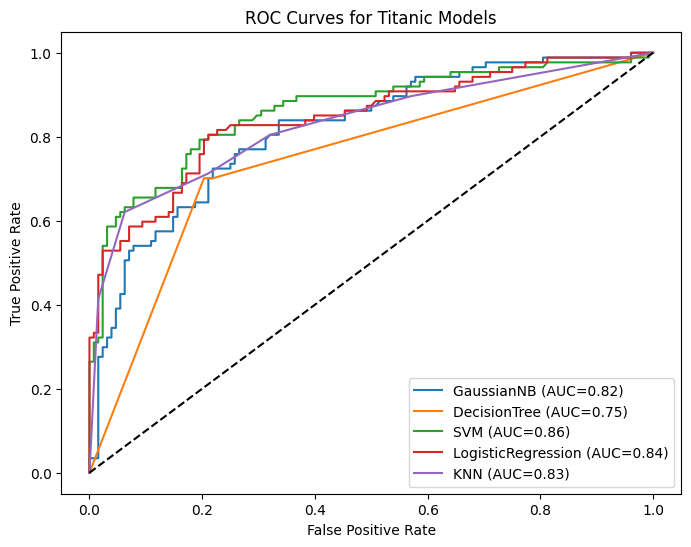

                Model  Accuracy  Precision  Recall  F1-Score
0          GaussianNB     0.744      0.663   0.747     0.703
1        DecisionTree     0.758      0.701   0.701     0.701
2                 SVM     0.791      0.792   0.655     0.717
3  LogisticRegression     0.767      0.713   0.713     0.713
4                 KNN     0.758      0.697   0.713     0.705


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# 1. Load Titanic dataset from seaborn (since sklearn doesn’t have Titanic)
titanic = sns.load_dataset("titanic").dropna(subset=["age", "sex", "fare", "class", "survived"])

# Preprocess categorical and numerical features
titanic["sex"] = titanic["sex"].map({"male": 0, "female": 1})
titanic["class"] = titanic["class"].map({"First": 1, "Second": 2, "Third": 3})

X = titanic[["sex", "age", "fare", "class"]]
y = titanic["survived"]

# 2. Split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Scale features (important for SVM, KNN, Logistic)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 3. Define models
models = {
    "GaussianNB": GaussianNB(),
    "DecisionTree": DecisionTreeClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "LogisticRegression": LogisticRegression(max_iter=1000, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

# 4. Fit, predict, and evaluate each model
results = []

plt.figure(figsize=(8,6))
for name, model in models.items():
    # Fit model
    model.fit(X_train_scaled, y_train)
    
    # Predict
    y_pred = model.predict(X_test_scaled)
    y_prob = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test_scaled)
    
    # 5. Compute metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    results.append([name, acc, prec, rec, f1])
    
    # 6. ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC={roc_auc:.2f})")

# Display ROC curves
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for Titanic Models")
plt.legend()
plt.show()

# 7. Display metrics
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score"])
print(results_df.round(3))
